In [77]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 50)

In [78]:
df = pd.read_csv('Google-Playstore.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


# 결측치 처리

In [79]:
df.isna().sum()

# Rating, Rating Count : 평균으로 대체
# Installs, Minimum Installs : Maximum Installs 값을 이용해 결측치 대체
# Minimum Android, Privacy Policy, Size, Developer Id : 사용하지 않을 컬럼이므로 drop
# Currency : 최빈값인 USD로 대체
# Developer Website : 결측치가 약 33%로 꽤나 많고, 최빈값 등으로 대체했을 때 인사이트 도출에 도움이 되지 않을 것이라고 생각하여 drop 하기로 결정
# Released : 결측치가 33,297개로 결측치가 있는 행을 모두 삭제하기엔 결측치 수가 많긴 하나, 데이터의 레코드 수가 많으므로 전체 중 결측치 비중으로 봤을 땐 약 3% 정도로 작은 편임
#            또한, 다른 값으로 대체할 시 해당 컬럼을 사용한 분석 결과에 영향을 줄 것이기 때문에 결측치가 존재하는 행을 모두 삭제하기로 결정
# App Name, Developer Email : 결측치 포함된 행 삭제하기

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [80]:
df_copy = df.copy()

In [81]:
# 1. Rating, Rating Count : 평균으로 대체
df_copy['Rating'] = df_copy['Rating'].fillna(round(df_copy['Rating'].mean(), 1))
df_copy['Rating Count'] = df_copy['Rating Count'].fillna(round(df_copy['Rating Count'].mean()))
df_copy[['Rating', 'Rating Count']].isna().sum()

Rating          0
Rating Count    0
dtype: int64

In [82]:
df_copy['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [83]:
# 2. Installs, Minimum Installs : Maximum Installs 값을 이용해 결측치 대체

# Installs 범주를 숫자값으로 매핑
installs_to_min = {
    '0+': 0, '1+': 1, '5+': 5, '10+': 10, '50+': 50, '100+': 100, '500+': 500,
    '1,000+': 1000, '5,000+': 5000, '10,000+': 10000, '50,000+': 50000,
    '100,000+': 100000, '500,000+': 500000, '1,000,000+': 1000000,
    '5,000,000+': 5000000, '10,000,000+': 10000000, '50,000,000+': 50000000,
    '100,000,000+': 100000000, '500,000,000+': 500000000,
    '1,000,000,000+': 1000000000, '5,000,000,000+': 5000000000,
    '10,000,000,000+': 10000000000
}

# 1. Installs 값이 결측인 경우, Maximum Installs 기준으로 적절한 Installs 범주 추정
def estimate_installs_from_max(max_val):
    if pd.isna(max_val):
        return np.nan
    for threshold, label in installs_to_min.items():
        if max_val < label:
            return threshold
        prev_label = threshold
    return '10,000,000,000+'

# 2. Minimum Installs 채우는 함수 (우선순위: 기존 값 → Installs 매핑 → NaN)
def fill_min_installs(row):
    if pd.notna(row['Minimum Installs']):
        return row['Minimum Installs']
    elif pd.notna(row['Installs']) and (row['Installs'] in installs_to_min):
        return installs_to_min[row['Installs']]
    else:
        return np.nan

# ---------- 적용 ----------
# 원본 데이터프레임 df를 가정
# 1단계: Installs 결측치 보간 (Maximum Installs 사용)
df_copy['Installs'] = df_copy['Installs'].fillna(df_copy['Maximum Installs'].apply(estimate_installs_from_max))

# 2단계: Minimum Installs 결측치 보간 (Installs 매핑)
df_copy['Minimum Installs'] = df_copy.apply(fill_min_installs, axis=1)
df_copy.isna().sum()

App Name                  5
App Id                    0
Category                  0
Rating                    0
Rating Count              0
Installs                  0
Minimum Installs          0
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [84]:
# 3. Minimum Android, Privacy Policy, Size, Developer Id, Developer Website : drop
df_copy = df_copy.drop(['Minimum Android', 'Privacy Policy', 'Size', 'Developer Website', 'Developer Id'], axis=1)
df_copy.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35


In [85]:
# 4. Currency : 최빈값인 USD로 대체
df_copy['Currency'] = df_copy['Currency'].fillna('USD')
df_copy['Currency'].isna().sum()

0

In [86]:
# 5. Released, App Name, Developer Email : 결측치가 있는 행 제거
df_copy = df_copy.dropna(subset=['Released', 'App Name', 'Developer Email']).reset_index(drop=True)
df_copy

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241856,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,lero.doe@gmail.com,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False,2021-06-16 12:59:18
2241857,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False,2021-06-16 12:59:19
2241858,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False,2021-06-16 12:59:19
2241859,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False,2021-06-16 12:59:19


In [87]:
df_copy.isna().sum().sum()

0

# 이상치, 중복치 처리

In [88]:
round(df_copy.describe(),3)

# 이상치는 크게 없는 것으로 보임

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2241861.000,2.241861e+06,2.241861e+06,2.241861e+06,2241861.000
mean,2.204,2.753670e+03,1.765933e+05,3.093197e+05,0.105
std,2.108,1.984681e+05,1.420051e+07,2.208542e+07,2.659
min,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000
25%,0.000,0.000000e+00,5.000000e+01,8.500000e+01,0.000
50%,3.000,6.000000e+00,5.000000e+02,7.040000e+02,0.000
75%,4.300,4.200000e+01,5.000000e+03,7.401000e+03,0.000
max,5.000,1.385576e+08,1.000000e+10,1.205763e+10,400.000


In [89]:
df_copy[df_copy.duplicated()]

# 중복치도 없음

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time


# 성공한 앱의 특성 분석

### 성공한 앱 기준 세우기
- 설치 수가 높다 -> Maximum Installs를 기준으로 상위 퍼센타일 (10%)
- 평점이 높다 -> Rating이 평균 이상

In [90]:
data = df_copy.copy()

In [91]:
df_copy.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35


In [92]:
install_10 = data['Maximum Installs'].quantile(0.9)
rating_mean = data['Rating'].mean()

data['success'] = (data['Maximum Installs'] >= install_10) & (data['Rating'] >= rating_mean)
data

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Email,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time,success
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241856,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,"1,000+",1000.0,1980,True,0.0,USD,lero.doe@gmail.com,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False,2021-06-16 12:59:18,False
2241857,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False,2021-06-16 12:59:19,False
2241858,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False,2021-06-16 12:59:19,False
2241859,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False,2021-06-16 12:59:19,False


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 폰트 경로 불러오기
import matplotlib.font_manager as fm
font_path = fm.findfont("Malgun Gothic")

# 폰트 설정 강제 지정
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


C:\Users\tomat\AppData\Local\Temp\ipykernel_2524\1617073793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_success[True], y=cat_success.index, palette='Blues_d')


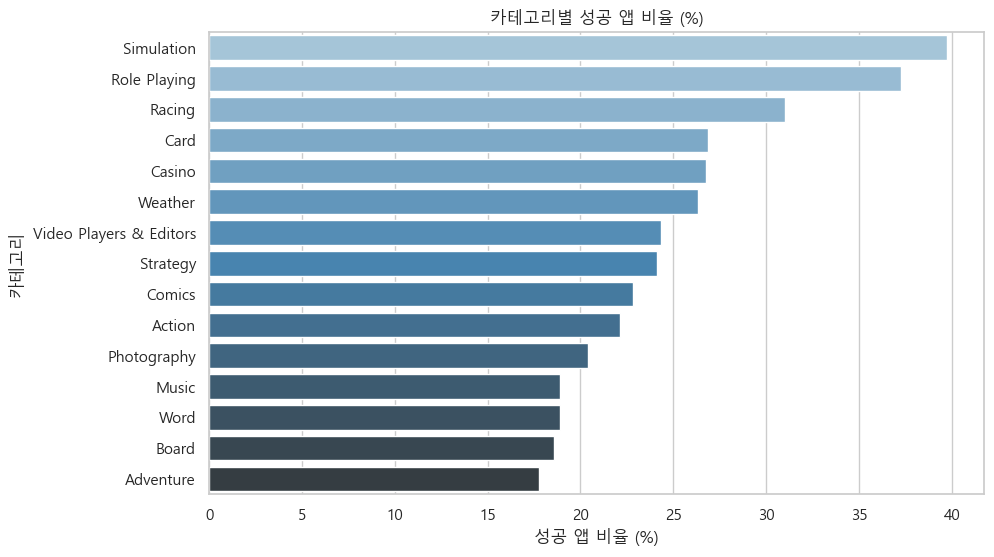

In [ ]:
### Categoroy 별 성공률

plt.figure(figsize=(10, 6))
cat_success = pd.crosstab(data['Category'], data['success'], normalize='index') * 100
cat_success = cat_success.sort_values(True, ascending=False).head(15)  # 성공률 높은 상위 15개

sns.barplot(x=cat_success[True], y=cat_success.index, palette='Blues_d')
plt.title('카테고리별 성공 앱 비율 (%)')
plt.xlabel('성공 앱 비율 (%)')
plt.ylabel('카테고리')
plt.show()

### 해석
# - 카테고리별 성공 앱 비율을 보면 게임 앱이 일반 앱보다 많이 차지하는 것을 볼 수 있음
# -> 게임 관련 앱을 개발했을 때 인기 앱이 될 확률이 높음
# 구글 플레이 스토어 카테고리 기준으로 '게임' 탭의 카테고리와 '앱' 탭의 카테고리로 나누기
# ※ 게임 앱 리스트 참고
# game_list = ['Adventure', 'Racing', 'Puzzle', 'Arcade', 'Board', 'Casual', 'Card', 'Trivia', 'Strategy', 
#             'Word', 'Action', 'Simulation', 'Music', 'Role Playing', 'Casino', 'Educational']

C:\Users\tomat\AppData\Local\Temp\ipykernel_2524\2059647027.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_success[True], y=content_success.index, palette='Greens_d')


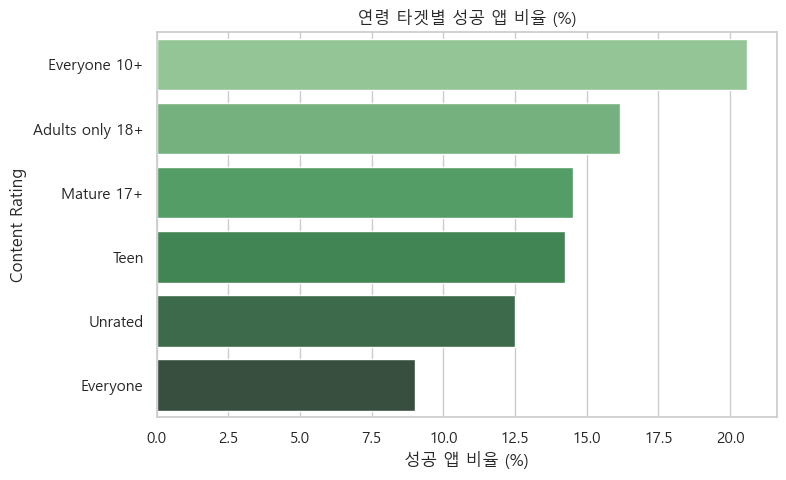

In [ ]:
### Content Rating 별 성공률
plt.figure(figsize=(8, 5))
content_success = pd.crosstab(data['Content Rating'], data['success'], normalize='index') * 100
content_success = content_success.sort_values(True, ascending=False)

sns.barplot(x=content_success[True], y=content_success.index, palette='Greens_d')
plt.title('연령 타겟별 성공 앱 비율 (%)')
plt.xlabel('성공 앱 비율 (%)')
plt.ylabel('Content Rating')
plt.show()

### 해석
# - Content Rating 컬럼이 연령별 이용 가능 등급을 뜻하지만 이러한 제한을 걸었다는 것은 해당 연령층을 타깃으로 개발했다는 것으로 볼 수 있음
# - 이러한 관점으로 보았을 때, 전 연령 이용 가능한 앱에 비해 연령별로 타겟팅 했을 때 성공할 확률이 높음을 알 수 있음

C:\Users\tomat\AppData\Local\Temp\ipykernel_2524\2957186037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=free_success.index.map({True: '무료', False: '유료'}), y=free_success[True], palette='Purples_d')


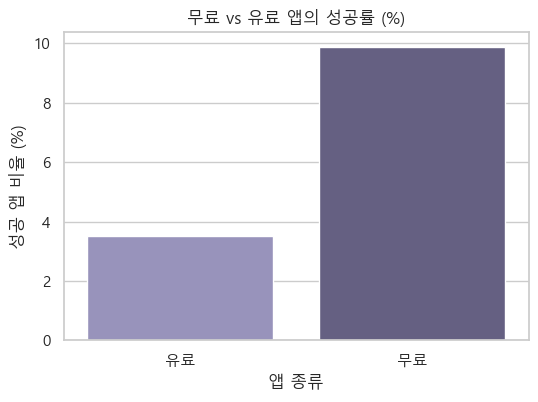

In [ ]:
### 유/무료 앱 성공률
plt.figure(figsize=(6, 4))
free_success = pd.crosstab(data['Free'], data['success'], normalize='index') * 100
sns.barplot(x=free_success.index.map({True: '무료', False: '유료'}), y=free_success[True], palette='Purples_d')
plt.title('무료 vs 유료 앱의 성공률 (%)')
plt.ylabel('성공 앱 비율 (%)')
plt.xlabel('앱 종류')
plt.show()

### 해석 
# - 유료 앱에 비해 무료 앱이 훨씬 많긴 하지만 유료 앱에 비해 무료 앱이 더 인기가 많음을 알 수 있음

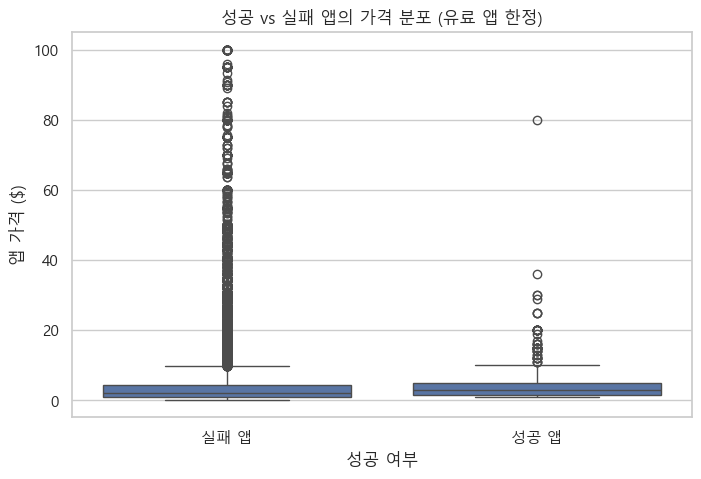

In [ ]:
### Price 분포 (유료 앱만)
plt.figure(figsize=(8, 5))
# 유료 앱만 필터링
paid_apps = data[(data['Free'] == False) & (data['Price'] > 0)]

# 가격이 너무 큰 이상치는 제거
paid_apps = paid_apps[paid_apps['Price'] < 100]

sns.boxplot(data=paid_apps, x='success', y='Price')
plt.xticks([0, 1], ['실패 앱', '성공 앱'])
plt.title('성공 vs 실패 앱의 가격 분포 (유료 앱 한정)')
plt.ylabel('앱 가격 ($)')
plt.xlabel('성공 여부')
plt.show()

### 해석
# - 유료 앱 중에서도 가격이 낮은 편이 성공할 확률이 높음을 알 수 있음

C:\Users\tomat\AppData\Local\Temp\ipykernel_2524\2230830801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ad_success.index.map({True: '광고 있음', False: '광고 없음'}), y=ad_success[True], palette='Oranges_d')


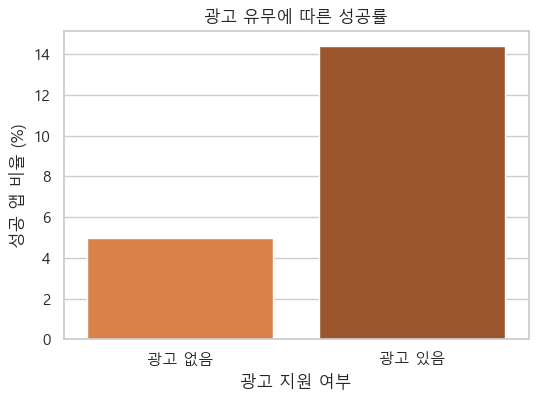

C:\Users\tomat\AppData\Local\Temp\ipykernel_2524\2230830801.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=iap_success.index.map({True: '결제 있음', False: '결제 없음'}), y=iap_success[True], palette='Blues_d')


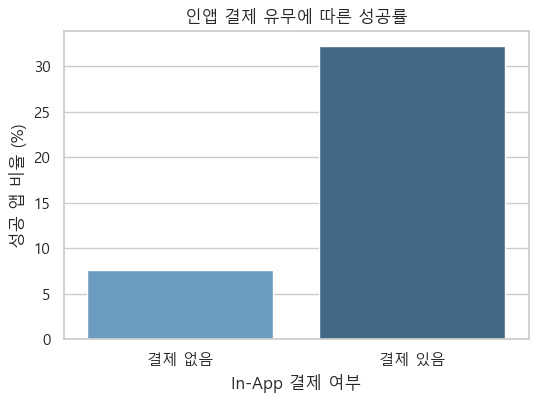

In [ ]:
### 수익화 방식: Ad Supported vs In App Purchases
# 광고 지원 여부
plt.figure(figsize=(6, 4))
ad_success = pd.crosstab(data['Ad Supported'], data['success'], normalize='index') * 100
sns.barplot(x=ad_success.index.map({True: '광고 있음', False: '광고 없음'}), y=ad_success[True], palette='Oranges_d')
plt.title('광고 유무에 따른 성공률')
plt.ylabel('성공 앱 비율 (%)')
plt.xlabel('광고 지원 여부')
plt.show()

# 인앱 결제 여부
plt.figure(figsize=(6, 4))
iap_success = pd.crosstab(data['In App Purchases'], data['success'], normalize='index') * 100
sns.barplot(x=iap_success.index.map({True: '결제 있음', False: '결제 없음'}), y=iap_success[True], palette='Blues_d')
plt.title('인앱 결제 유무에 따른 성공률')
plt.ylabel('성공 앱 비율 (%)')
plt.xlabel('In-App 결제 여부')
plt.show()

### 해석 
# - 광고가 있고, In-App 결제가 있는 앱이 더 인기가 많음을 알 수 있음
# -> 이는 카테고리에서 게임 앱의 비중이 많은 것과 관련이 있을 것으로 생각됨
#    게임 앱의 경우, 광고나 In-App 결제가 있는 경우가 대다수이므로 이러한 결과가 나온 것으로 생각됨

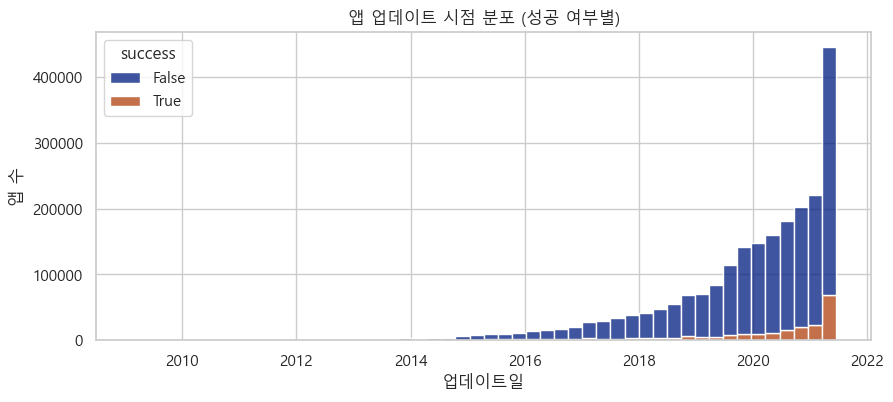

In [ ]:
### 출시일 & 업데이트일 분포 (Released, Last Updated)
# 날짜 변환
data['Released'] = pd.to_datetime(data['Released'])
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

# 최근 업데이트 시점
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Last Updated', hue='success', bins=50, palette='dark', multiple='stack')
plt.title('앱 업데이트 시점 분포 (성공 여부별)')
plt.xlabel('업데이트일')
plt.ylabel('앱 수')
plt.show()

### 해석
# - 앱 업데이트 시점이 최근일 수록 성공할 확률이 높은 것을 알 수 있음